In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from statsmodels.tsa.stattools import acf , pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima

In [5]:
df=pd.read_csv("C:/Users/Pansi/Downloads/AAPL(1).csv")
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [6]:
data = df.iloc[8000:].copy()

Text(0, 0.5, 'Correlation Coefficient')

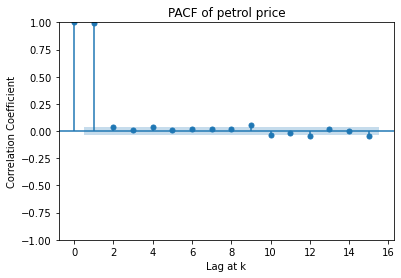

In [7]:
apprice = data['Close']
plot_pacf(apprice, lags=15)
plt.title("PACF of petrol price")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")

We should see the lag 1 and 2 order explain most of the higher order. we should use order 1 or 2 autoregression to fit.  

In [8]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(apprice)
print('ADF statistic is:',adf[0])
print('p value:', adf[1])

ADF statistic is: 1.901892966927382
p value: 0.9985310583583394


From p value we know the stock price is not stationary

In [9]:
pdiff1 = apprice.diff(1).bfill()
adf = adfuller(pdiff1)
print('ADF statistic is:',adf[0])
print('p value:', adf[1])

ADF statistic is: -10.575146707847072
p value: 7.137349773187612e-19


From p value we know the difference of the price is stationary

Text(0.5, 0, 'Lag at k')

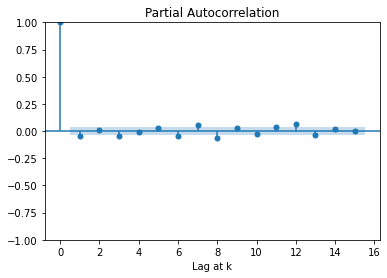

In [10]:
plot_pacf(pdiff1, lags=15)
plt.xlabel("Lag at k")

take p = 1

Text(0.5, 0, 'Lag at k')

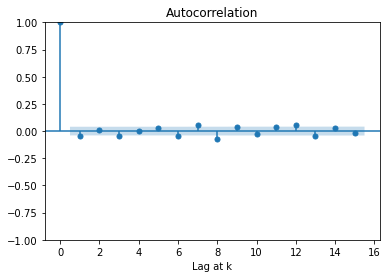

In [11]:
plot_acf(pdiff1, lags=15)
plt.xlabel("Lag at k")

take q = 1

In [12]:
from statsmodels.tsa.arima.model import ARIMA

#print(model_fit.summary())


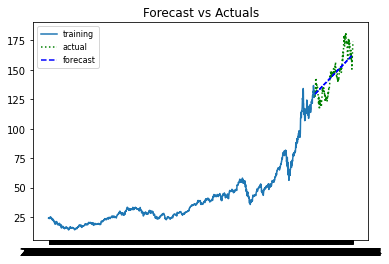

In [37]:

train = apprice[:-300]
test =  apprice[-300:]
model = ARIMA(train, order = (1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit()
forcast = model_fit.forecast(300, D=1, alpha=0.05)
forcast_series = pd.Series(forcast.values, index=test.index)
#lower_bound = pd.Series(conf_int[:, 0], index=test.index)
#upper_bound = pd.Series(conf_int[:, 1], index=test.index)

# Plot
#plt.figure(figsize=(10,7), dpi=100)
plt.plot(train, label='training')
plt.plot(test, 'g:', label='actual')
plt.plot(forcast_series ,'b--', label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()